In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [4]:
# Load the stock price dataset
from google.colab import drive

drive.mount('/content/drive')

data = pd.read_csv('/content/drive/MyDrive/all_stocks_5yr.csv')
print(data.columns[4])
data.head(5)

Mounted at /content/drive
close


,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


Epoch 1/50
6771/6771 - 20s - loss: 5.5467e-05 - 20s/epoch - 3ms/step
Epoch 2/50
6771/6771 - 17s - loss: 6.7560e-06 - 17s/epoch - 3ms/step
Epoch 3/50
6771/6771 - 21s - loss: 5.9635e-06 - 21s/epoch - 3ms/step
Epoch 4/50
6771/6771 - 18s - loss: 5.5525e-06 - 18s/epoch - 3ms/step
Epoch 5/50
6771/6771 - 17s - loss: 5.3694e-06 - 17s/epoch - 3ms/step
Epoch 6/50
6771/6771 - 17s - loss: 5.2593e-06 - 17s/epoch - 3ms/step
Epoch 7/50
6771/6771 - 17s - loss: 5.2173e-06 - 17s/epoch - 3ms/step
Epoch 8/50
6771/6771 - 17s - loss: 5.1392e-06 - 17s/epoch - 3ms/step
Epoch 9/50
6771/6771 - 16s - loss: 5.1672e-06 - 16s/epoch - 2ms/step
Epoch 10/50
6771/6771 - 16s - loss: 5.1426e-06 - 16s/epoch - 2ms/step
Epoch 11/50
6771/6771 - 18s - loss: 5.0821e-06 - 18s/epoch - 3ms/step
Epoch 12/50
6771/6771 - 17s - loss: 5.1381e-06 - 17s/epoch - 2ms/step
Epoch 13/50
6771/6771 - 19s - loss: 5.0959e-06 - 19s/epoch - 3ms/step
Epoch 14/50
6771/6771 - 17s - loss: 5.1154e-06 - 17s/epoch - 2ms/step
Epoch 15/50
6771/6771 - 16s -

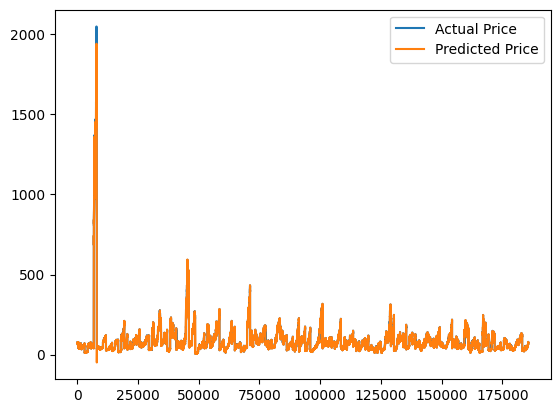

In [5]:
# Select 'Close' prices as the feature to predict
data = data[['close']]
dataset = data.values
dataset = dataset.astype('float32')

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

# Split data into training and testing sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train_data, test_data = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

# Function to create the dataset with look-back for time series data
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Reshape dataset into X=t and Y=t+1
look_back = 3  # Change this for different time steps
trainX, trainY = create_dataset(train_data, look_back)
testX, testY = create_dataset(test_data, look_back)

# Reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=64, verbose=2)

# Predict on test data
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

# Plotting results
plt.plot(testY.flatten(), label='Actual Price')
plt.plot(testPredict.flatten(), label='Predicted Price')
plt.legend()
plt.show()